In [1]:
import pandas as pd
import numpy as np
from fredapi import Fred
import yfinance as yf
import glob
import matplotlib.pyplot as plt

In [2]:
start_date = '2023-09-01'
end_date = '2024-09-01'

In [3]:
# target stock data: close stock price, SMA, EMA
# competitor stock price: competitor stock close price
# macroeconomic indicators: ADS
# industry related data: FRED('CBBTCUSD', 'CBETHUSD')
# financial & investment data: FF5, FRED('SP500', 'NASDAQ', 'DOWJONES')


In [4]:
# NVDA Stock Price
NVDA_stock_price = yf.download("NVDA", start_date, end_date)['Adj Close']
NVDA_stock_price_df = pd.DataFrame(NVDA_stock_price)
NVDA_stock_price_df.index.name = 'Date'
NVDA_stock_price_df.index = NVDA_stock_price_df.index.strftime('%y%m%d')
# Display descriptive statistics for stock prices
print(NVDA_stock_price_df.describe())
print(NVDA_stock_price_df.head())


[*********************100%***********************]  1 of 1 completed

Ticker        NVDA
count   251.000000
mean     79.087297
std      30.490399
min      40.311028
25%      48.138235
50%      79.499191
75%     104.843807
max     135.559067
Ticker       NVDA
Date             
230901  48.486996
230905  48.525974
230906  47.043526
230907  46.223827
230908  45.555077


In [5]:
tmp_NVDA_stock_price = yf.download("NVDA", '2023-07-24', end_date)['Adj Close']
tmp_NVDA_stock_price_df = pd.DataFrame(tmp_NVDA_stock_price)
tmp_NVDA_stock_price_df.index.name = 'Date'
tmp_NVDA_stock_price_df.index = tmp_NVDA_stock_price_df.index.strftime('%y%m%d')
windowSize = 30

[*********************100%***********************]  1 of 1 completed


In [6]:
# SMA & EMA
tmp_NVDA_stock_price_df['SMA'] = tmp_NVDA_stock_price_df['NVDA'].rolling(window=windowSize).mean()
tmp_NVDA_stock_price_df['EMA'] = tmp_NVDA_stock_price_df['NVDA'].ewm(span=windowSize, adjust=False).mean()
tmp_NVDA_stock_price_df = tmp_NVDA_stock_price_df[tmp_NVDA_stock_price_df.index.isin(NVDA_stock_price_df.index)]
NVDA_stock_price_df['SMA'] = tmp_NVDA_stock_price_df['SMA']
NVDA_stock_price_df['EMA'] = tmp_NVDA_stock_price_df['EMA']
print(tmp_NVDA_stock_price_df.describe())

Ticker        NVDA         SMA         EMA
count   251.000000  251.000000  251.000000
mean     79.087297   74.836629   74.808948
std      30.490399   28.924440   28.427233
min      40.311028   43.251566   43.175496
25%      48.138237   45.821812   46.654716
50%      79.499191   70.274342   70.986584
75%     104.843807   93.264200   96.901066
max     135.559067  126.040735  122.826998


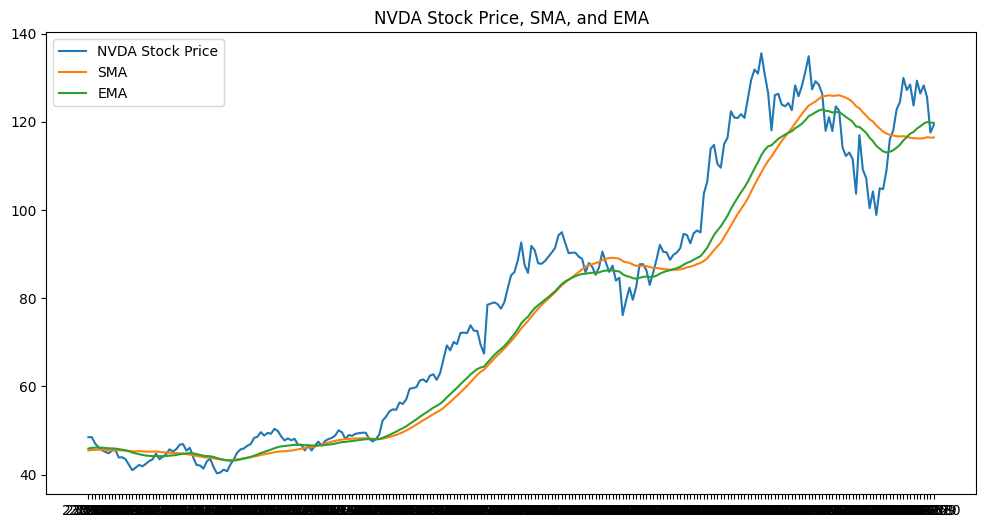

In [7]:
# Visualize the stock price, SMA, and EMA
plt.figure(figsize=(12,6))
plt.plot(NVDA_stock_price_df['NVDA'], label='NVDA Stock Price')
plt.plot(NVDA_stock_price_df['SMA'], label='SMA')
plt.plot(NVDA_stock_price_df['EMA'], label='EMA')
plt.title('NVDA Stock Price, SMA, and EMA')
plt.legend()
plt.show()

In [8]:
# Competitors stock price
competitors = ['AMD', 'INTC', 'QCOM', 'AAPL', 'AVGO']
competitors_stock_price = yf.download(competitors, start_date, end_date)['Adj Close']
competitors_stock_price_df = pd.DataFrame(competitors_stock_price)
competitors_stock_price_df.index.name = 'Date'
competitors_stock_price_df.index = competitors_stock_price_df.index.strftime('%y%m%d')
print(competitors_stock_price_df.describe())
print(competitors_stock_price_df.head())
# competitors_stock_price_df.to_csv('competitors_stock_price.csv')

[*********************100%***********************]  5 of 5 completed

Ticker        AAPL         AMD        AVGO        INTC        QCOM
count   251.000000  251.000000  251.000000  251.000000  251.000000
mean    189.827508  147.360677  122.638521   36.445328  154.109453
std      18.559049   28.342445   27.476382    7.405938   32.134434
min     164.405121   93.669998   79.609314   18.990000  102.104317
25%     174.560921  122.160000   95.772259   30.898989  126.858337
50%     185.949036  152.270004  125.089081   35.935158  155.524490
75%     195.181763  167.779999  139.818703   42.780405  173.123146
max     234.290741  211.380005  181.710449   50.089161  224.746796
Ticker        AAPL         AMD       AVGO       INTC        QCOM
Date                                                            
230901  188.288300  109.449997  85.462494  36.007771  112.443375
230905  188.526810  110.779999  85.428223  36.106117  113.573753
230906  181.778809  109.279999  85.438004  36.371681  111.751503
230907  176.461899  106.589996  83.945259  37.551941  103.682945
230908 

In [9]:
# ADS Index Data
ADS = pd.read_excel('./data/ADS_Index_Most_Current_Vintage.xlsx')
ADS['Date'] = pd.to_datetime(ADS['Date'], format='%Y:%m:%d')
ADS = ADS[(ADS['Date'] >= pd.to_datetime(start_date)) & (ADS['Date'] <= pd.to_datetime(end_date))]
ADS['Date'] = ADS['Date'].dt.strftime('%y%m%d')
ADS = ADS[ADS['Date'].isin(NVDA_stock_price_df.index)]
ADS.set_index('Date', inplace=True)
print(ADS.describe())
print(ADS.head())


        ADS_Index
count  251.000000
mean    -0.156398
std      0.242557
min     -0.800350
25%     -0.322790
50%     -0.134328
75%      0.057300
max      0.230637
        ADS_Index
Date             
230901   0.060395
230905   0.070788
230906   0.071438
230907   0.071330
230908   0.070466


In [10]:
# Fama French 5 Factors
FF5 = pd.read_csv('./data/FF5.csv')
FF5.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
FF5['Date'] = pd.to_datetime(FF5['Date'], format='%Y%m%d')
FF5 = FF5[(FF5['Date'] >= pd.to_datetime(start_date)) & (FF5['Date'] <= pd.to_datetime(end_date))]
FF5['Date'] = FF5['Date'].dt.strftime('%y%m%d')
FF5 = FF5[FF5['Date'].isin(NVDA_stock_price_df.index)]
FF5.set_index('Date', inplace=True)
print(FF5.describe())
print(FF5.head())

           Mkt-RF         SMB         HML         RMW         CMA          RF
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000
mean     0.074781   -0.031633    0.020319    0.015020   -0.028327    0.021159
std      0.817401    0.876510    0.671864    0.515387    0.436150    0.000557
min     -3.020000   -2.520000   -1.430000   -1.530000   -1.400000    0.020000
25%     -0.330000   -0.600000   -0.495000   -0.310000   -0.265000    0.021000
50%      0.060000   -0.110000   -0.020000    0.020000   -0.050000    0.021000
75%      0.600000    0.460000    0.425000    0.350000    0.220000    0.021000
max      2.390000    4.210000    2.460000    1.480000    1.430000    0.022000
        Mkt-RF   SMB   HML   RMW   CMA     RF
Date                                         
230901    0.26  0.84  0.58 -0.03 -0.20  0.021
230905   -0.54 -1.58 -0.86 -0.30 -0.47  0.021
230906   -0.71  0.01 -0.18 -0.45  0.10  0.021
230907   -0.40 -0.69  0.03 -0.20  0.02  0.021
230908    0.12 -0.51  

In [11]:
# Fred API
fred = Fred(api_key='96b8dcff4c5efa52d89e588594f2930c')

In [12]:
varList = [
    'CBBTCUSD', 'CBETHUSD' # Cryptocurrencies
]

BTC = {}
for var in varList:
    try:
        series_data = fred.get_series(var, observation_start=start_date, observation_end=end_date)
        BTC[var] = series_data
    except Exception as e:
        print(f"Error fetching data for {var}: {e}")

BTC_df = pd.DataFrame(BTC)
BTC_df.index.name = 'Date'

BTC_df.index = pd.to_datetime(BTC_df.index).strftime('%y%m%d')

BTC_df = BTC_df[BTC_df.index.isin(NVDA_stock_price_df.index)]

print(BTC_df.describe())
print(BTC_df.head())


           CBBTCUSD     CBETHUSD
count    251.000000   251.000000
mean   51434.516972  2694.042351
std    14926.775117   719.164085
min    25161.680000  1539.260000
25%    38295.160000  2105.010000
50%    56684.730000  2640.160000
75%    64807.550000  3333.460000
max    73098.480000  4072.220000
        CBBTCUSD  CBETHUSD
Date                      
230901  25802.02   1628.83
230905  25778.03   1633.25
230906  25748.10   1632.05
230907  26267.36   1646.92
230908  25906.35   1636.26


In [13]:
varList = [
    'SP500', 'NASDAQCOM', 'DJIA' 
]

fred_data = {}

for var in varList:
    try:
        series_data = fred.get_series(var, observation_start=start_date, observation_end=end_date)
        fred_data[var] = series_data
    except Exception as e:
        print(f"Error fetching data for {var}: {e}")
fred_df = pd.DataFrame(fred_data)
fred_df.index.name = 'Date'
fred_df.index = pd.to_datetime(fred_df.index).strftime('%y%m%d')
reference_dates = NVDA_stock_price_df.index  
fred_df = fred_df[fred_df.index.isin(reference_dates)]

print(fred_df.describe())
print(fred_df.head())


             SP500     NASDAQCOM          DJIA
count   251.000000    251.000000    251.000000
mean   4967.770398  15647.563386  37650.591394
std     428.518699   1553.565219   2314.278918
min    4117.370000  12595.610000  32417.590000
25%    4563.260000  14262.175000  36002.660000
50%    5051.410000  15865.250000  38503.690000
75%    5305.380000  16778.385000  39142.545000
max    5667.200000  18647.450000  41563.080000
          SP500  NASDAQCOM      DJIA
Date                                
230901  4515.77   14031.81  34837.71
230905  4496.83   14020.95  34641.97
230906  4465.48   13872.47  34443.19
230907  4451.14   13748.83  34500.73
230908  4457.49   13761.53  34576.59


In [14]:
feature = pd.concat([NVDA_stock_price_df, competitors_stock_price_df, ADS, FF5, BTC_df, fred_df], axis=1)
feature.to_csv('featurePrepared.csv')

### macd

In [15]:
def get_macd(data, close_col):
    data = data.copy()

    # SMA20 & SMA50
    data['EMA12'] = data[close_col].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data[close_col].ewm(span=26, adjust=False).mean()

    # Calculate Z
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    
    return data[['MACD','MACD_Signal']]

### mom

In [16]:
def calculate_obv(data,close_col):
    # set OBV with zeros
    obv = [0]  
    
    for i in range(1, data.shape[0]):
        current_close = data.loc[i,close_col]
        previous_close = data.loc[i-1,close_col]        
        current_volume = data.loc[i,close_col]
        # If Current's close is higher than last day -> add today's vol
        if current_close > previous_close:
            obv.append(obv[-1] + current_volume)
        # If Current's close is lower than last day  -> min today's vol
        elif current_close < previous_close:
            obv.append(obv[-1] - current_volume)
        # If Current's close is equal to last day, -> keep 
        else:
            obv.append(obv[-1])
    
    data['OBV'] = obv
    return data[['OBV']]

### rsi

In [17]:
def calculate_rs(data, close_col, window):
    """  𝑅𝑆 = 𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑜𝑓 𝑥 𝑑𝑎𝑦𝑠′𝑢𝑝 𝑐𝑙𝑜𝑠𝑒𝑠/𝐴𝑣𝑒𝑟𝑎𝑔𝑒 𝑜𝑓 𝑥 𝑑𝑎𝑦𝑠′ 𝑑𝑜𝑤𝑛 𝑐𝑙𝑜𝑠𝑒𝑠 """
    data = data.copy()
    
    # Calculate up closes & down closes
    up_closes = data[close_col].diff().apply(lambda x: x if x > 0 else 0)
    down_closes = data[close_col].diff().apply(lambda x: abs(x) if x < 0 else 0)
    
    # Calculate the moving average 
    avg_up_closes = up_closes.rolling(window=window).mean()
    avg_up_down = down_closes.rolling(window=window).mean()
    
    return avg_up_closes/avg_up_down


def calculate_rsi(data, close_col, window):
    """ 𝑅𝑆𝐼 = 100 − 100/(1 + 𝑅𝑆) """
    data = data.copy()
    
    rs = calculate_rs(data, close_col, window)

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    # Add RSI to the DataFrame
    data['RSI'] = rsi    
    return data[['RSI']]

In [18]:
NVDA_stock_price = yf.download("NVDA", '2023-08-01', end_date)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [19]:
df_macd = get_macd(NVDA_stock_price.reset_index(),'NVDA')
df_obv = calculate_obv(NVDA_stock_price.reset_index(),'NVDA')
df_rsi = calculate_rsi(NVDA_stock_price.reset_index(), 'NVDA', window=21)

In [20]:
df_add_feature = pd.concat([NVDA_stock_price.reset_index()[['Date']],df_macd, df_obv,df_rsi,],axis=1).set_index('Date')

In [21]:
df_add_feature.index = df_add_feature.index.strftime('%y%m%d')

In [22]:
df_add_feature = df_add_feature.reset_index()

In [23]:
df_add_feature['Date'] = df_add_feature['Date'].astype('int64')

In [24]:
df_add_feature.to_csv('addFeature.csv')

## add feature

In [25]:
df_feature = pd.read_csv('featurePrepared.csv')

In [26]:
df_new = pd.merge(df_feature, df_add_feature.reset_index(), on='Date', how='left')

In [27]:
del df_new['index']

In [28]:
df_new.columns

Index(['Date', 'NVDA', 'SMA', 'EMA', 'AAPL', 'AMD', 'AVGO', 'INTC', 'QCOM',
       'ADS_Index', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'CBBTCUSD',
       'CBETHUSD', 'SP500', 'NASDAQCOM', 'DJIA', 'MACD', 'MACD_Signal', 'OBV',
       'RSI'],
      dtype='object')

In [29]:
df_new.to_csv('DataCollected.csv')